<a href="https://colab.research.google.com/github/QuynhNgoc59/RFM-analysis-for-Customer-Segmentation/blob/main/RFM_analysis_for_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. RFM Analysis explanation**

**RFM Analysis definition:**

RFM stands for *Recency*, *Frequency*, and *Monetary* value, each corresponding to some key customer trait.
- Recency: Time since last order or last engaged with the products
- Frequency: Total number of transactions or average time between transactions/ engaged visits.
- Monetary: Total or average transactions value.

**Benefits of implementing RFM Analysis:**

*RFM analysis helps marketers find answers to the following questions:*

Who are your best customers?

Which of your customers could contribute to your churn rate?

Who has the potential to become valuable customers?

Which of your customers can be retained?

Which of your customers are most likely to respond to engagement campaigns?


*Reference*: https://clevertap.com/blog/rfm-analysis/

**2. RFM Analysis implementation**

### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal, the name of the country where each customer resides.

**2.1. Data wrangling**

**2.1.1. Handling null values**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_sales = pd.read_csv("/content/drive/MyDrive/Final project/ecommerce retail.csv")

In [ ]:
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  int64  
 7   Country      397924 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.3+ MB
None


In [ ]:
print(df_sales.describe())

            Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


In [ ]:
#Remove missing CustomerID
df_sales = df_sales.dropna()
df_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


**2.1.2. Correcting data type**

In [ ]:
#Correct data type of 'CustomerID'
df_sales['CustomerID'] = df_sales['CustomerID'].astype(int)
#Correct data type of 'InvoiceDate'
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate']).dt.date
display(df_sales.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

**2.1.3. Filtering data**

In [ ]:
#Exclude oders with quantity >= 0
df_sales = df_sales[df_sales['Quantity']>=0]
df_sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


**2.2. RFM Score calculation**

**2.2.1. Calcualting R score**

In [ ]:
#RECENCY INDEX CALCULATION
df_recency = df_sales[['CustomerID', 'InvoiceDate']]

##Get the last order date of each customer
Last_order_date = df_recency.groupby('CustomerID')['InvoiceDate'].max()
df_recency = Last_order_date.reset_index()

##Set the target date
df_recency['Target_date'] = pd.Timestamp('2011-12-31')
df_recency['Target_date'] = pd.to_datetime(df_recency['Target_date']).dt.date

##Calculate the date gap between target date & last order date
df_recency['Recency'] = (df_recency['Target_date'] - df_recency['InvoiceDate']).dt.days
df_recency['Recency'] = df_recency['Recency'].astype(int)
df_recency = df_recency[['CustomerID', 'Recency']]
df_recency

,CustomerID,Recency
0,12346,347
1,12347,24
2,12348,97
3,12349,40
4,12350,332
...,...,...
4334,18280,299
4335,18281,202
4336,18282,29
4337,18283,25


**2.2.2. Calcualting F score**

In [ ]:
#FREQUENCY INDEX CALCULATION
df_frequency = df_sales[['CustomerID', 'InvoiceNo']]

##Count the total orders by customer
df_frequency = df_frequency.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_frequency.rename(columns = {'InvoiceNo':'Frequency'}, inplace = True)
df_frequency

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4334,18280,1
4335,18281,1
4336,18282,2
4337,18283,16


**2.2.3. Calcualting M score**

In [ ]:
#MONETARY INDEX CALCULATION
df_sales
df_monetary = df_sales[['CustomerID', 'Quantity', 'UnitPrice']]

##Calculate total revenue by customer
df_monetary['Monetary'] = df_monetary['Quantity']*df_monetary['UnitPrice']
df_monetary = df_monetary.groupby(['CustomerID'])['Monetary'].sum().reset_index()
df_monetary

<ipython-input-76-9636489bae8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monetary['Monetary'] = df_monetary['Quantity']*df_monetary['UnitPrice']


,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


**2.2.4. Grouping RFM scores by segment**

In [ ]:
#Join R & F & M tables
RFM = df_recency.merge(df_frequency, on='CustomerID')\
                       .merge(df_monetary, on='CustomerID')
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346,347,1,77183.60
1,12347,24,7,4310.00
2,12348,97,4,1797.24
3,12349,40,1,1757.55
4,12350,332,1,334.40
...,...,...,...,...
4334,18280,299,1,180.60
4335,18281,202,1,80.82
4336,18282,29,2,178.05
4337,18283,25,16,2094.88


In [ ]:
#Calculate RFM score
r_labels, f_labels, m_labels = range(5, 0, -1), range(1, 6), range(1, 6)

RFM['R_score'] = pd.qcut(RFM['Recency'], q=5, labels=r_labels)
RFM['F_score'] = pd.qcut(RFM['Frequency'].rank(method='first'), q=5, labels=False) + 1
RFM['M_score'] = pd.qcut(RFM['Monetary'], q=5, labels=m_labels)

RFM['RFM_score'] = RFM['R_score'].astype(str) + RFM['F_score'].astype(str) + RFM['M_score'].astype(str)
RFM


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,12346,347,1,77183.60,1,1,5,115
1,12347,24,7,4310.00,5,5,5,555
2,12348,97,4,1797.24,2,4,4,244
3,12349,40,1,1757.55,4,1,4,414
4,12350,332,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280,299,1,180.60,1,2,1,121
4335,18281,202,1,80.82,1,2,1,121
4336,18282,29,2,178.05,5,3,1,531
4337,18283,25,16,2094.88,5,5,5,555


In [ ]:
#RFM Score by Segment preview
seg = pd.read_csv('/content/drive/MyDrive/Final project/Segmentation.csv')
seg.columns = [col.replace(' ', '_') for col in seg.columns]
seg

,Segment,RFM_Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
#Convert RFM score lists into rows
df_segmentation = pd.read_csv('/content/drive/MyDrive/Final project/Segmentation.csv')
df_segmentation['RFM_score'] = df_segmentation['RFM Score'].str.split(',')
df_segmentation = df_segmentation.explode('RFM_score')
df_segmentation = df_segmentation[['Segment','RFM_score']]

#Remove spaces in RFM_score column
df_segmentation['RFM_score'] = df_segmentation['RFM_score'].str.strip()
df_segmentation

,Segment,RFM_score
0,Champions,555
0,Champions,554
0,Champions,544
0,Champions,545
0,Champions,454
...,...,...
10,Lost customers,112
10,Lost customers,121
10,Lost customers,131
10,Lost customers,141


In [ ]:
#Join calculated RFM table & segmentation table
Customer_segmentation = RFM.merge(df_segmentation, on=['RFM_score'], how='left')
Customer_segmentation

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,12346,347,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347,24,7,4310.00,5,5,5,555,Champions
2,12348,97,4,1797.24,2,4,4,244,At Risk
3,12349,40,1,1757.55,4,1,4,414,Promising
4,12350,332,1,334.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4334,18280,299,1,180.60,1,2,1,121,Lost customers
4335,18281,202,1,80.82,1,2,1,121,Lost customers
4336,18282,29,2,178.05,5,3,1,531,Potential Loyalist
4337,18283,25,16,2094.88,5,5,5,555,Champions


**2.3. Data visualization & Insights**

**2.3.1. Distribution of each variable R, F, M**

<ipython-input-81-6ca7be44633d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Customer_segmentation[col])


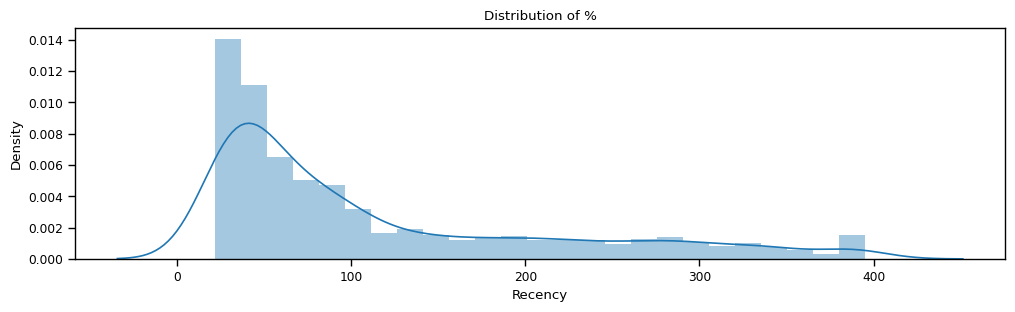

<ipython-input-81-6ca7be44633d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Customer_segmentation[col])


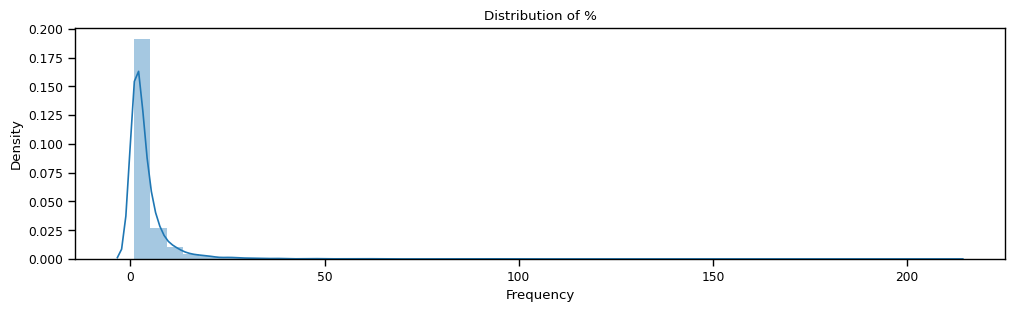

<ipython-input-81-6ca7be44633d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Customer_segmentation[col])


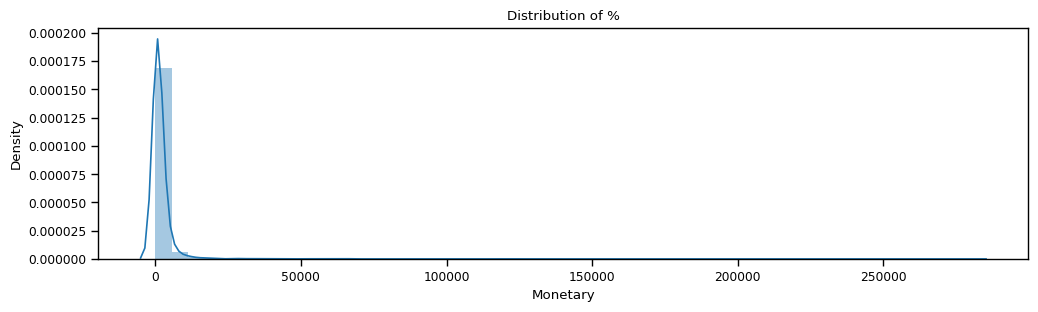

In [ ]:
#Show distribution of each variable of the model
import matplotlib.pyplot as plt
import seaborn as sns

colnames = ['Recency', 'Frequency', 'Monetary']
for col in colnames:
  fig, ax = plt.subplots(figsize=(12,3))
  sns.distplot(Customer_segmentation[col])
  ax.set_title('Distribution of %')
  plt.show()


**2.3.2. Segment percentage by Customer & Revenue**

In [ ]:
#Count the total customers of each segment
Grouped_cus = Customer_segmentation[['CustomerID', 'Segment']]
Grouped_cus = Grouped_cus.groupby("Segment").agg(Cus_count=pd.NamedAgg(column="Segment", aggfunc="count"))

#Transform aggregate result to dataframe
Grouped_cus = Grouped_cus.groupby('Segment').Cus_count.sum().reset_index()

#Count the total number of customers
Grouped_cus['Total_cus'] = Grouped_cus['Cus_count'].sum()

#Calcualte the %customer of each segment in the total share
Grouped_cus['Count_share'] = Grouped_cus['Cus_count']/Grouped_cus['Total_cus']
Grouped_cus

,Segment,Cus_count,Total_cus,Count_share
0,About To Sleep,283,4339,0.065222
1,At Risk,423,4339,0.097488
2,Cannot Lose Them,91,4339,0.020973
3,Champions,835,4339,0.192441
4,Hibernating customers,695,4339,0.160175
5,Lost customers,486,4339,0.112007
6,Loyal,428,4339,0.098640
7,Need Attention,281,4339,0.064761
8,New Customers,268,4339,0.061765
9,Potential Loyalist,413,4339,0.095183


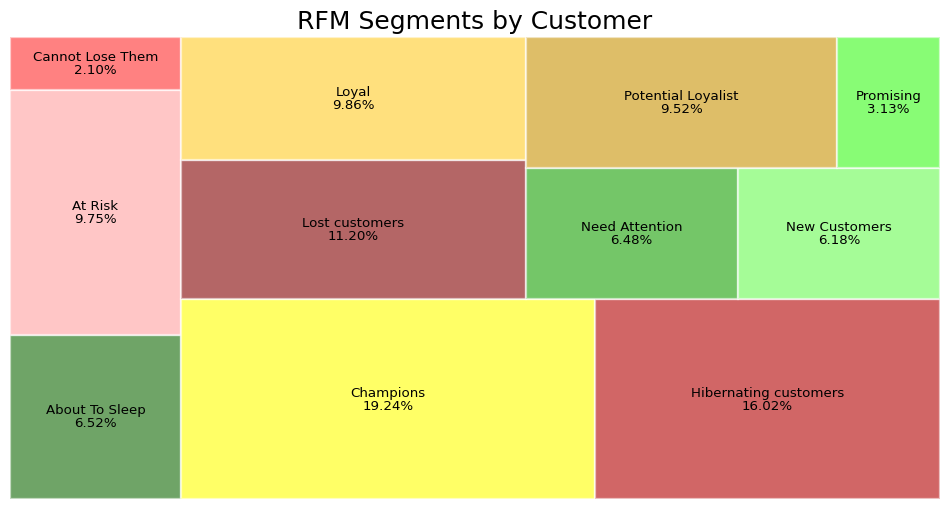

In [ ]:
#Visualize the segmentation by customer
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify -qqq
import squarify

colors = ['#106802', '#ffa1a1', '#ff2e2e', '#FFFF00', '#b30000', '#820000', '#ffcc26', '#18a003', '#6afb52', '#C89403', '#39fa1a']
fig, ax = plt.subplots(1, figsize = (12,6))
squarify.plot (sizes=Grouped_cus['Cus_count'],
               label=Grouped_cus['Segment'],
               value=[f'{i*100:.2f}%' for i in Grouped_cus['Count_share']],
               alpha=.6,
               color=colors,
               bar_kwargs=dict(linewidth=1.6, edgecolor="white"))
plt.title('RFM Segments by Customer', fontsize=18)
plt.axis('off')
plt.show()

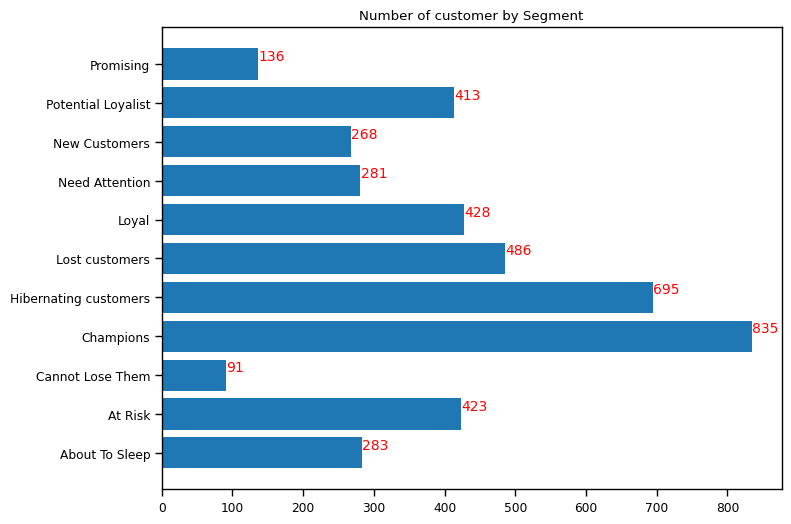

In [ ]:
#Visualize the number of customers by segment
fig, ax = plt.subplots(figsize =(8, 6))
ax.barh(Grouped_cus['Segment'], Grouped_cus['Cus_count'])
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10,
             color ='red')
ax.set_title('Number of customer by Segment', loc ='center')
plt.show()

In [ ]:
#Calcualte the total revenue of each segment
Grouped_rev = Customer_segmentation[['Monetary', 'Segment']]
Grouped_rev = Grouped_rev.groupby(['Segment'])['Monetary'].sum().reset_index()

#Calcualte the total revenue of all segments
Grouped_rev['Total_rev'] = Grouped_rev['Monetary'].sum()

#Calculate the %revenue of each segment in the total share
Grouped_rev['Rev_share'] = Grouped_rev['Monetary']/Grouped_rev['Total_rev']
Grouped_rev

,Segment,Monetary,Total_rev,Rev_share
0,About To Sleep,77885.540,8911407.904,0.008740
1,At Risk,752061.261,8911407.904,0.084393
2,Cannot Lose Them,203671.300,8911407.904,0.022855
3,Champions,5604376.680,8911407.904,0.628899
4,Hibernating customers,285420.302,8911407.904,0.032029
5,Lost customers,97405.610,8911407.904,0.010930
6,Loyal,1021224.390,8911407.904,0.114597
7,Need Attention,463778.001,8911407.904,0.052043
8,New Customers,59755.620,8911407.904,0.006706
9,Potential Loyalist,224797.850,8911407.904,0.025226


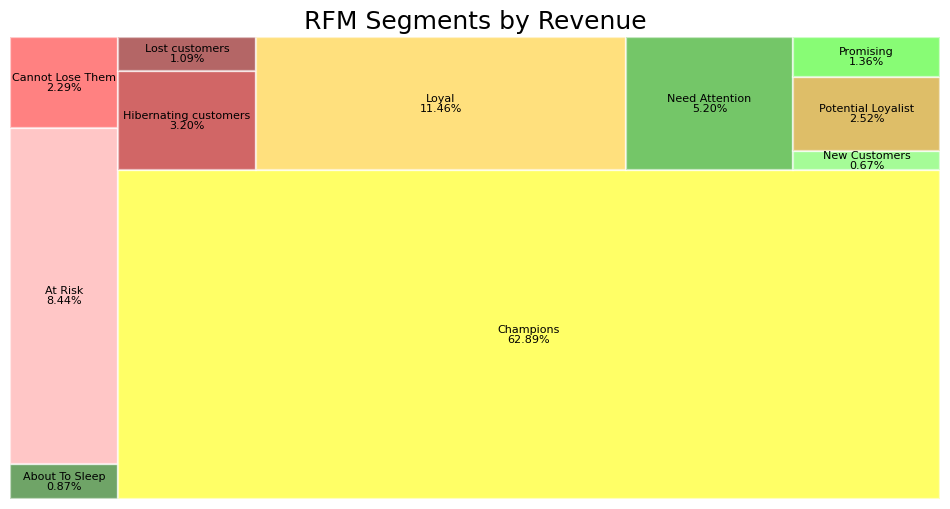

In [ ]:
#Visualize the segmentation by revenue
colors = ['#106802', '#ffa1a1', '#ff2e2e', '#FFFF00', '#b30000', '#820000', '#ffcc26', '#18a003', '#6afb52', '#C89403', '#39fa1a']
fig, ax = plt.subplots(1, figsize = (12,6))
squarify.plot (sizes=Grouped_rev['Monetary'],
               label=Grouped_rev['Segment'],
               value=[f'{i*100:.2f}%' for i in Grouped_rev['Rev_share']],
               alpha=.6,
               color=colors,
               bar_kwargs=dict(linewidth=1.6, edgecolor="white"),
               text_kwargs={'fontsize':8})
plt.title('RFM Segments by Revenue', fontsize=18)
plt.axis('off')
plt.show()

**2.3.3. Insights & Recommendations for better customer retention**

**Champions**
(555, 554, 544,
545, 454, 455,
445)

- Đây là những KH quan trọng nhất với doanh
nghiệp với các chỉ số R, F, M đều cao.
- Là tập KH lớn nhất về tổng số KH (835/
4339 KH) cũng như chiếm tỷ trọng doanh thu
lớn nhất (62.89%).

- Cần tiếp tục đẩy mạnh CSKH, tạo các
chương trình tri ân KH, tặng quà các dịp lễ,
sinh nhật, ... → duy trì sự hài lòng của KH
trong dài hạn.

**Loyal**
(543, 444, 435,
355, 354, 345,
344, 335)

- Là tập KH quan trọng với chỉ số F và M cao
đem lại nguồn doanh thu ổn định cho doanh
nghiệp.
- Nhóm này có tổng số KH lớn thứ tư (9.86%)
và tổng doanh thu lớn thứ hai (11.46%).

- Cần xây dựng các chiến lược marketing
phù hợp → nâng cao tỷ trọng KH nhóm này
trên tổng số KH.

**Potential Loyalist**
(553, 551, 552,
541, 542, 533,
532, 531, 452,
451, 442, 441,
431, 453, 433,
432, 423, 353,
352, 351, 342,
341, 333, 323)

- Nhóm KH này có chỉ số F ở mức trung bình
cao cho thấy KH mua hàng với tần suất khá
thường xuyên, mặc dù giá trị đơn hàng không
lớn (chỉ số M thấp).
- Số lượng KH nhóm này hiện đang ở mức
trung bình (413/ 4339 KH - chiếm 9.52% tổng
số KH).

- Cần có các kế hoạch kích thích mua hàng
như quảng cáo/ giới thiệu thêm những mặt
hàng mà nhóm KH này quan tâm → tăng
chỉ số F → tăng khả năng đưa những KH
này lên nhóm Loyal và sau đó là
Champions.

**New Customers**
(512, 511, 422,
421, 412, 411,
311)

- Chỉ số R cao cho thấy đây là nhóm KH có
các đơn hàng trong thời gian gần đây, tuy
nhiên tần suất đặt hàng cũng như giá trị đơn
hàng lại khá thấp (chỉ số F và M thấp).
- Tập KH khá nhỏ - xếp thứ 3 trong tổng số
KH chỉ với 6.18%.

- Cần có các kế hoạch tiếp cận nhóm KH
này tương tự như với nhóm Potential
Loyalist, tuy nhiên cần thực hiện với tần suất
thường xuyên và mức độ quan tâm cao hơn.

**Promising**
(525, 524, 523,
522, 521, 515,
514, 513,
425,424,413,414,4
15, 315, 314, 313)

- Là tập KH khá mới với các giao dịch phát
sinh trong gần đây với chỉ số R ở mức khá
cao; trung bình tần suất & giá trị đơn hàng thì
tương đối thấp.
- Tỷ trọng KH & doanh thu đóng góp của
nhóm này đều rất thấp - lần lượt 3.13% và 1.36% trên tổng thị phần.

- Cần đưa ra các kế hoạch marketing phù
hợp với nhóm này để gia tăng tần suất mua
hàng & giá trị các đơn hàng (mua 1 tặng 1,
giảm giá ở lần mua tiếp theo,...).

**Need Attention**
(535, 534, 443,
434,
343, 334, 325,
324)

- Những KH này thường đặt hàng với giá trị
khá lớn, tuy nhiên các đơn hàng lại không
đều đặn phát sinh.
- Số lượng KH không nhiều (6.48%) cũng như
% đóng góp cho tổng doanh thu không đáng
kể (5.2%).

- Cần tương tác với KH nhiều hơn bằng
cách gửi email/ tin nhắn thông báo về các
voucher khuyến mãi, chương trình giảm
giá,... để giữ chân KH.

**About To Sleep**
(331, 321, 312,
221, 213, 231,
241, 251)

- Là nhóm KH có khả năng rời bỏ cao (chỉ số
R, F, M đều thấp).
- Nhóm này có số lượng KH ở mức thấp
(6.52%) cũng như tỷ lệ đóng góp cho tổng
doanh thu không lớn (0.87%).

- Nhóm này cần được tiếp cận thường
xuyên hơn bằng các chương trình gia tăng
tần suất mua hàng (đặt X đơn hàng thì nhận
được mã freeship/ giảm giá cho lần mua tới,
...) → tránh tình trạng KH rời bỏ vĩnh viễn.

**At Risk**
(255, 254, 245,
244, 253, 252,
243, 242, 235,
234, 225, 224,
153, 152, 145,
143, 142, 135,
134, 133, 125,
124)

- Nhóm KH này thường mua hàng với tần
suất và giá trị đơn hàng ở mức trung bình
cao, tuy nhiên đã lâu chưa quay trở lại (chỉ số
R thấp).
- Tỷ lệ đóng góp cho tổng doanh thu của
nhóm này là 8.44% - xếp thứ 3 trong toàn bộ
các nhóm KH.

- Cần có các kế hoạch tiếp cận lại với nhóm
KH này bằng cách phân tích đặc điểm tiêu
dùng của KH → lôi kéo các KH quay trở lại.

**Cannot lose them**
(155, 154, 144,
214, 215, 115,
114, 113)

- Là những KH không thường xuyên đặt hàng
cũng như đã lâu chưa quay lại (chỉ số R và F
thấp).
- Tập KH này có số lượng KH ít nhất trên tổng
4339 KH.

- Cần chú trọng tăng tương tác trở lại với
KH, gửi thông báo cho KH về các sản phẩm
mới, các chương trình đặc biệt,... → kích
thích tiêu dùng trở lại → có thể tăng tần suất
mua hàng của KH trong dài hạn.

**Hibernating customers**
(332, 322, 233,
232, 223, 222,
132, 123, 122,
212, 211)

- Đây là nhóm KH đã gần như ngừng đặt
hàng (chỉ số R trung bình - thấp).
- Số lượng KH nhóm này khá lớn, xếp thứ 2
trên tổng số KH (695/ 4339).

- Do lượng KH nhóm này tương đối nhiều,
doanh nghiệp cần triển khai phân tích
nguyên nhân KH dừng đặt hàng → đưa ra
các biện pháp cải thiện phù hợp → cải thiện
các chỉ số của nhóm này.

**Lost customers**
(111, 112, 121,
131,141,151)

- Nhóm này bao gồm những KH có chỉ số R
thấp nhất - cho thấy họ này đã ngừng đặt
hàng một thời gian dài.
- Số lượng KH nhóm này hiện đứng thứ 3 -
chiếm 11.2% trong tổng số KH.

- Cần tìm hiểu nguyên nhân tại sao KH rời
bỏ (vấn đề về sản phẩm/ dịch vụ/...) → đưa
ra được các cách tiếp cận phù hợp để lôi
kéo KH trở lại.

▶️**TÓM TẮT:**

**1. Các tệp KH cần tập trung nhất**
+ Champions (nhóm KH này chiếm tỉ trọng lớn nhất về số lượng; %doanh thu chiếm hơn 1⁄2 tổng doanh thu => là
nguồn doanh thu ổn định & dồi dào cho doanh nghiệp)
+ Potential Loyalist (những đơn hàng của các KH này tuy không có giá trị cao nhưng tần suất rất đều đặn trong
giai đoạn 2010-2011 => họ có khả năng trở thành KH Loyal trong tương lai nếu được tiếp cận phù hợp).
+ At risk (những KH này thường mua hàng với tần suất + giá trị cao tuy nhiên vì một số lý do mà họ đã ngưng đặt
hàng thời gian gần đây => chú trọng tìm nguyên nhân + phân tích hành vi KH sẽ giúp doanh nghiệp tìm được
phương pháp phù hợp tiếp cận nhóm này)
+ Lost customers (nhóm này có lượng KH nhiều thứ 3 trong tất cả các nhóm KH => việc phân tích nguyên nhân
KH rời bỏ + đưa ra biện pháp cải thiện phù hợp sẽ có thể đưa KH quay trả lại => tăng doanh thu trong dài hạn cho
doanh nghiệp)

**2. Các nhóm giải pháp gợi ý**
+ Duy trì sự hài lòng của KH (đối với các nhóm Champions, Loyal, Potential loyalist): tạo các chương trình tri
ân KH, tặng quà các dịp lễ, sinh nhật,....; thường xuyên khảo sát KH về mức độ hài lòng đối với sản phẩm/ dịch vụ.
+ Gia tăng tần suất đặt hàng + giá trị đơn hàng (đối với các nhóm New Customers, Promising, Need
Attention, About To Sleep): mua 1 tặng 1, giảm giá ở lần mua tiếp theo, freeship; gửi thông báo về các voucher
khuyến mãi, chương trình giảm giá, ...
+ Phân tích hành vi tiêu dùng (đối với các nhóm At Risk, Cannot Lose Them, Hibernating customers, Lost
customers): phân tích nguyên nhân KH ngừng/ lâu không đặt hàng từ đó có hướng tiếp cận phù hợp hơn.